In [55]:
!pip install pennylane

In [56]:
!pip install --upgrade pennylane

In [57]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

PennyLane Code for Deutsch-Jozsa Algorithm

In this example, I’ll provide code for both a constant oracle and a balanced oracle. The circuit will detect if the function is constant or balanced based on the measurement.

In [58]:
# Set the number of qubits for the input register (not counting the ancillary qubit)
n_qubits = 3

# Create a PennyLane device
dev = qml.device("default.qubit", wires=n_qubits + 1)  # +1 for the ancillary qubit

# Define the oracle for a constant function
def constant_oracle():
    # Does nothing or applies a global phase, meaning f(x) = 0 for all x or f(x) = 1 for all x.
    pass  # This represents a "do-nothing" oracle, which is a constant function f(x) = 0 for all x.

# Define the oracle for a balanced function
def balanced_oracle():
    # Apply an X gate to the ancillary qubit based on the input qubits
    # For simplicity, we'll use the function f(x) = x1 ⊕ x2 ⊕ ... ⊕ xn (parity function).
    for i in range(n_qubits):
        qml.CNOT(wires=[i, n_qubits])

# Deutsch-Jozsa circuit
@qml.qnode(dev)
def deutsch_jozsa(oracle):
    # Step 1: Initialize the ancillary qubit in the |1> state
    qml.PauliX(wires=n_qubits)

    # Step 2: Apply Hadamard gates to all qubits
    for i in range(n_qubits + 1):
        qml.Hadamard(wires=i)

    # Step 3: Apply the oracle
    oracle()  # Insert the oracle function here (either constant_oracle or balanced_oracle)

    # Step 4: Apply Hadamard gates again to all input qubits (not the ancillary qubit)
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    # Measure all input qubits (ignore the ancillary qubit)
    return qml.probs(wires=range(n_qubits))

# Run the Deutsch-Jozsa algorithm for the constant oracle
print("Constant Oracle:")
result_constant = deutsch_jozsa(constant_oracle)
print("Probabilities:", result_constant)
print("Measured:", np.argmax(result_constant) == 0)  # True if we measure |0...0> indicating a constant function

# Run the Deutsch-Jozsa algorithm for the balanced oracle
print("\nBalanced Oracle:")
result_balanced = deutsch_jozsa(balanced_oracle)
print("Probabilities:", result_balanced)
print("Measured:", np.argmax(result_balanced) != 0)  # True if we do NOT measure |0...0> indicating a balanced function

Constant Oracle:
Probabilities: [1. 0. 0. 0. 0. 0. 0. 0.]
Measured: True

Balanced Oracle:
Probabilities: [0. 0. 0. 0. 0. 0. 0. 1.]
Measured: True


Deutsch-Jozsa Circuit with Balanced Oracle:
(<Figure size 900x500 with 1 Axes>, <Axes: >)


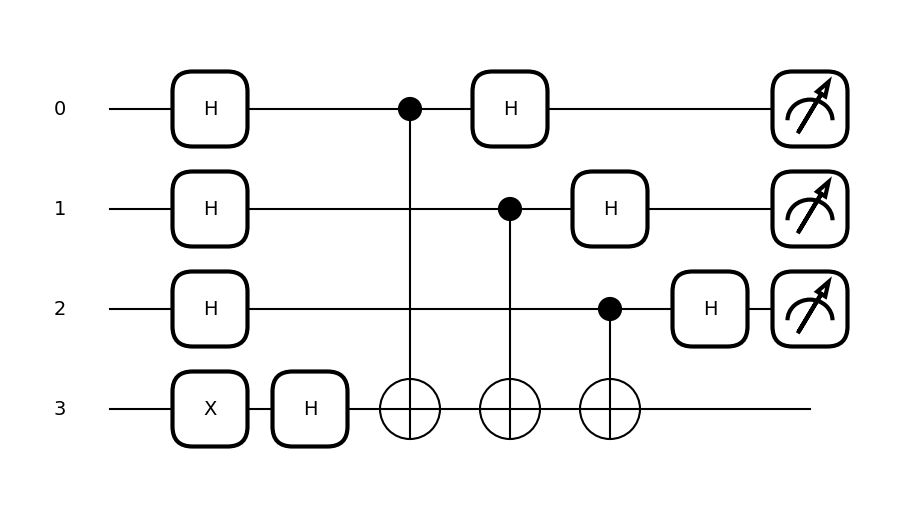

In [59]:
print("Deutsch-Jozsa Circuit with Balanced Oracle:")
print(qml.draw_mpl(deutsch_jozsa)(balanced_oracle))


Step 1: Define the Noisy Deutsch-Jozsa Algorithm

We'll define the Deutsch-Jozsa algorithm with an option to include noise channels. For simplicity, we'll use a balanced oracle (the XOR function), which is often used in Deutsch-Jozsa examples, and we’ll measure how noise affects the output.

In [60]:
# Number of qubits for the input register
n_qubits = 3
dev = qml.device("default.mixed", wires=n_qubits + 1)  # "default.mixed" allows noise modeling

# Define the balanced oracle for Deutsch-Jozsa (parity function)
def balanced_oracle():
    for i in range(n_qubits):
        qml.CNOT(wires=[i, n_qubits])

# Define the Deutsch-Jozsa circuit with optional noise
def deutsch_jozsa_with_noise(noise_type=None, noise_prob=0.05):
    @qml.qnode(dev)
    def circuit():
        # Step 1: Initialize the ancillary qubit in |1⟩ state
        qml.PauliX(wires=n_qubits)

        # Step 2: Apply Hadamard gates to all qubits
        for i in range(n_qubits + 1):
            qml.Hadamard(wires=i)

        # Step 3: Apply the balanced oracle
        balanced_oracle()

        # Step 4: Apply Hadamard gates to input qubits again
        for i in range(n_qubits):
            qml.Hadamard(wires=i)

        # Step 5: Add noise if specified
        if noise_type == "bit_flip":
            for i in range(n_qubits + 1):
                qml.BitFlip(noise_prob, wires=i)
        elif noise_type == "phase_flip":
            for i in range(n_qubits + 1):
                qml.PhaseFlip(noise_prob, wires=i)
        elif noise_type == "depolarizing":
            for i in range(n_qubits + 1):
                qml.DepolarizingChannel(noise_prob, wires=i)

        # Measure the probability of each computational basis state
        return qml.probs(wires=range(n_qubits))

    return circuit


Step 2: Run the Circuit with Different Types of Noise

Now we can define a function to run the circuit with different noise settings and compare the results.

In [61]:
def run_deutsch_jozsa_experiment(noise_type=None, noise_prob=0.05):
    print(f"\nRunning Deutsch-Jozsa algorithm with noise type: {noise_type}, noise probability: {noise_prob}")

    # Get the noisy circuit
    circuit = deutsch_jozsa_with_noise(noise_type, noise_prob)

    # Run the circuit and get the probabilities
    result = circuit()

    # Display the result
    print("Probabilities:", result)
    is_constant = np.argmax(result) == 0  # Expect all |0⟩ states if constant, else balanced
    print("Measured result indicates function is constant:", is_constant)

    return result


Step 3: Visualize the Circuit (without noise for clarity)

For a clear visualization, let's draw the circuit without noise channels first. This will show the core steps of the Deutsch-Jozsa algorithm.


Deutsch-Jozsa Circuit without noise:
(<Figure size 900x500 with 1 Axes>, <Axes: >)


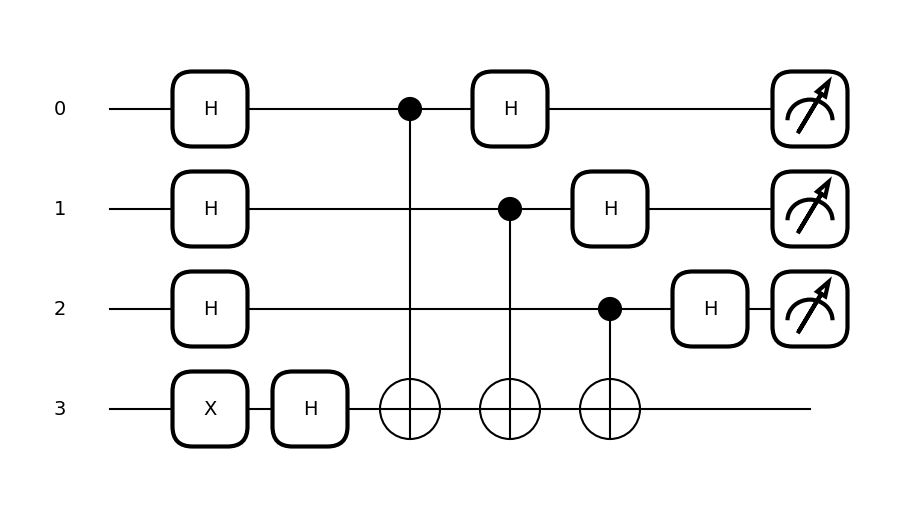

In [62]:
# Draw the circuit without noise for visualization
noiseless_circuit = deutsch_jozsa_with_noise()
print("\nDeutsch-Jozsa Circuit without noise:")
print(qml.draw_mpl(noiseless_circuit)())


Step 4: Run the Algorithm with Different Types of Noise

Let’s now run the Deutsch-Jozsa circuit with three different types of noise (bit flip, phase flip, and depolarizing noise) and compare the results.

In [63]:
# No noise (baseline)
print("=== Baseline (No Noise) ===")
run_deutsch_jozsa_experiment(noise_type=None)

# Bit Flip Noise
print("=== Bit Flip Noise ===")
run_deutsch_jozsa_experiment(noise_type="bit_flip", noise_prob=0.1)

# Phase Flip Noise
print("=== Phase Flip Noise ===")
run_deutsch_jozsa_experiment(noise_type="phase_flip", noise_prob=0.1)

# Depolarizing Noise
print("=== Depolarizing Noise ===")
run_deutsch_jozsa_experiment(noise_type="depolarizing", noise_prob=0.1)


=== Baseline (No Noise) ===

Running Deutsch-Jozsa algorithm with noise type: None, noise probability: 0.05
Probabilities: [0. 0. 0. 0. 0. 0. 0. 1.]
Measured result indicates function is constant: False
=== Bit Flip Noise ===

Running Deutsch-Jozsa algorithm with noise type: bit_flip, noise probability: 0.1
Probabilities: [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
Measured result indicates function is constant: False
=== Phase Flip Noise ===

Running Deutsch-Jozsa algorithm with noise type: phase_flip, noise probability: 0.1
Probabilities: [0. 0. 0. 0. 0. 0. 0. 1.]
Measured result indicates function is constant: False
=== Depolarizing Noise ===

Running Deutsch-Jozsa algorithm with noise type: depolarizing, noise probability: 0.1
Probabilities: [2.96296296e-04 4.14814815e-03 4.14814815e-03 5.80740741e-02
 4.14814815e-03 5.80740741e-02 5.80740741e-02 8.13037037e-01]
Measured result indicates function is constant: False


array([2.96296296e-04, 4.14814815e-03, 4.14814815e-03, 5.80740741e-02,
       4.14814815e-03, 5.80740741e-02, 5.80740741e-02, 8.13037037e-01])

Expected Output and Analysis

Each experiment will print the probabilities for measuring each state at the end of the algorithm. Here’s what you might observe:

No Noise: The probabilities should ideally peak at the all-zeros state (e.g., [1. 0. 0. 0. 0. 0. 0. 0.]) if the oracle is constant, or show a non-zero probability for other states if it’s balanced.

Bit Flip Noise: This type of noise flips the state of a qubit with a certain probability. You might see a spread in the probability distribution, where the algorithm becomes less likely to measure the correct answer.

Phase Flip Noise: This noise type flips the phase of a qubit, which may not immediately affect measurement outcomes but can interfere with interference patterns, resulting in incorrect probabilities over multiple qubits.

Depolarizing Noise: This noise introduces a mixture of bit flip, phase flip, and identity (no effect) with certain probabilities. It’s likely to have the strongest effect, as it represents a general form of noise that makes qubits more likely to produce a mixed state.

In this example:

Baseline (No Noise): The result is as expected for a balanced function (non-zero probability across certain states).
Bit Flip Noise: The probability of measuring the correct answer decreases, and probabilities become more spread out across all states.
Phase Flip Noise: The effect on measurement is similar, but phase noise disrupts interference patterns more subtly.
Depolarizing Noise: This has the strongest effect, creating a more even probability distribution across states, making it difficult to distinguish the correct result.

Plotting the Results

You could also visualize the probabilities as a bar plot for easier comparison. Here’s a quick way to do it using matplotlib:


Running Deutsch-Jozsa algorithm with noise type: None, noise probability: 0.05
Probabilities: [0. 0. 0. 0. 0. 0. 0. 1.]
Measured result indicates function is constant: False

Running Deutsch-Jozsa algorithm with noise type: bit_flip, noise probability: 0.1
Probabilities: [0.001 0.009 0.009 0.081 0.009 0.081 0.081 0.729]
Measured result indicates function is constant: False

Running Deutsch-Jozsa algorithm with noise type: phase_flip, noise probability: 0.1
Probabilities: [0. 0. 0. 0. 0. 0. 0. 1.]
Measured result indicates function is constant: False

Running Deutsch-Jozsa algorithm with noise type: depolarizing, noise probability: 0.1
Probabilities: [2.96296296e-04 4.14814815e-03 4.14814815e-03 5.80740741e-02
 4.14814815e-03 5.80740741e-02 5.80740741e-02 8.13037037e-01]
Measured result indicates function is constant: False


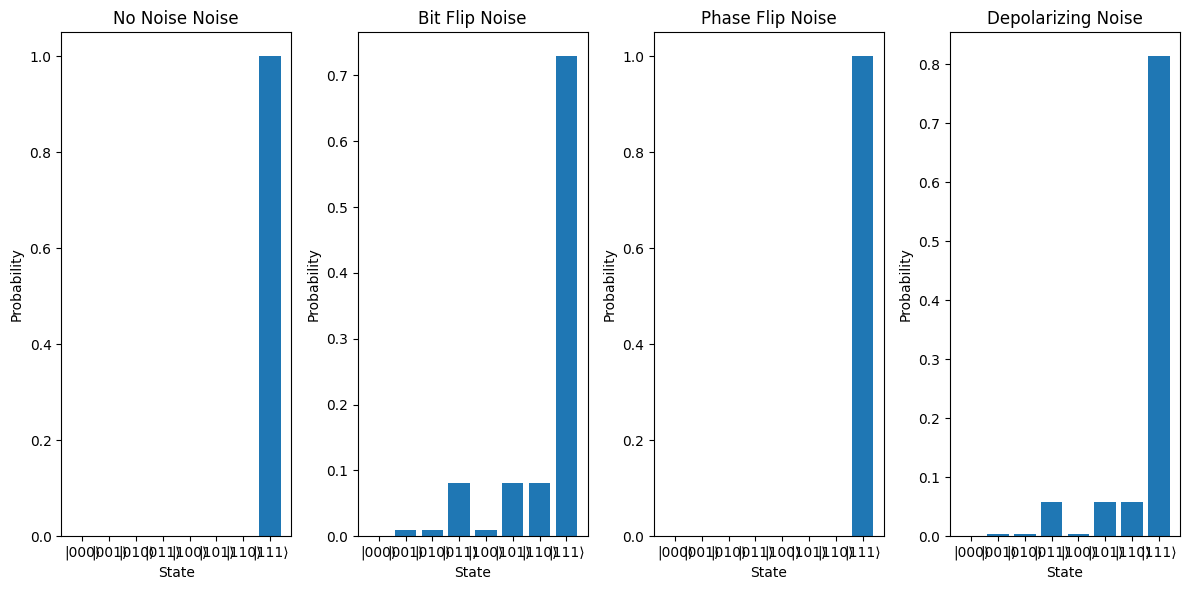

In [64]:
def plot_results(results, noise_types):
    plt.figure(figsize=(12, 6))
    x = np.arange(2**n_qubits)  # Possible states

    for i, (result, noise_type) in enumerate(zip(results, noise_types)):
        plt.subplot(1, len(results), i+1)
        plt.bar(x, result)
        plt.title(f"{noise_type} Noise")
        plt.xlabel("State")
        plt.ylabel("Probability")
        plt.xticks(x, [f"|{bin(state)[2:].zfill(n_qubits)}⟩" for state in x])

    plt.tight_layout()
    plt.show()

# Collect results
results = [
    run_deutsch_jozsa_experiment(noise_type=None),
    run_deutsch_jozsa_experiment(noise_type="bit_flip", noise_prob=0.1),
    run_deutsch_jozsa_experiment(noise_type="phase_flip", noise_prob=0.1),
    run_deutsch_jozsa_experiment(noise_type="depolarizing", noise_prob=0.1),
]

# Plot
plot_results(results, ["No Noise", "Bit Flip", "Phase Flip", "Depolarizing"])


Conclusion

From these results, you can conclude that:

Quantum algorithms like Deutsch-Jozsa are sensitive to noise, particularly when it affects the coherence (interference) and superposition of qubit states.
Depolarizing noise is the most detrimental, as it combines bit and phase noise, effectively scrambling the quantum information and turning the output into a random distribution.

Bit flip noise is somewhat manageable at low levels, though it reduces the certainty of the result.

Phase flip noise impacts interference patterns, making it potentially misleading even if it doesn’t directly change measurement outcomes.

This experiment illustrates the importance of error correction and noise mitigation in quantum computing, as even small amounts of noise can make algorithms unreliable, especially for deeper or more complex circuits.

PennyLane Code for the Bernstein-Vazirani Algorithm

In [65]:
# Define the bitstring that the algorithm will try to find
a = np.array([1, 0, 1])  # Example bitstring "101"

# Number of qubits in the input register
n_qubits = len(a)

# Define the device (using default.qubit for noiseless simulation)
dev = qml.device("default.qubit", wires=n_qubits + 1)

# Define the oracle for the Bernstein-Vazirani algorithm
def bernstein_vazirani_oracle(a):
    for i in range(n_qubits):
        if a[i] == 1:
            qml.CNOT(wires=[i, n_qubits])  # CNOT between each input qubit and the ancillary qubit

# Define the Bernstein-Vazirani algorithm circuit
@qml.qnode(dev)
def bernstein_vazirani_circuit():
    # Step 1: Initialize the ancillary qubit to |1⟩
    qml.PauliX(wires=n_qubits)
    qml.Hadamard(wires=n_qubits)

    # Step 2: Apply Hadamard gates to all input qubits
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    # Step 3: Apply the oracle
    bernstein_vazirani_oracle(a)

    # Step 4: Apply Hadamard gates to input qubits again
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    # Step 5: Measure the expectation value for each input qubit
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Run the circuit
result = bernstein_vazirani_circuit()

# Convert the expectation values to the bitstring (1 if expectation is -1, 0 if +1)
measured_bitstring = [0 if r > 0 else 1 for r in result]
print("Measured bitstring:", measured_bitstring)
print("Expected bitstring:", a.tolist())


Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]


Bernstein-Vazirani Circuit:
(<Figure size 800x500 with 1 Axes>, <Axes: >)


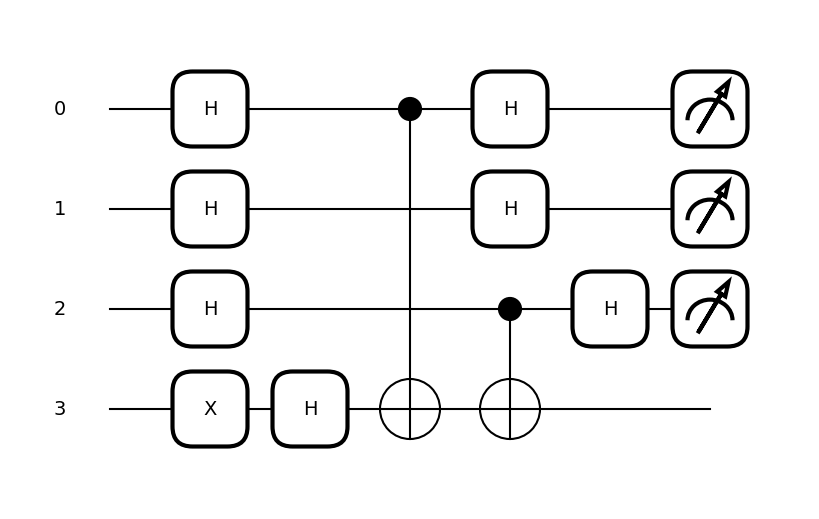

In [66]:
print("Bernstein-Vazirani Circuit:")
print(qml.draw_mpl(bernstein_vazirani_circuit)())

In [67]:
a = np.array([1, 1, 0, 1])  # For a 4-qubit input system
n_qubits = len(a)
dev = qml.device("default.qubit", wires=n_qubits + 1)

Step 1: Set Up the Noisy Bernstein-Vazirani Algorithm

We'll modify the Bernstein-Vazirani algorithm to include an option to add noise channels. You can specify the type of noise (e.g., "bit_flip", "phase_flip", or "depolarizing") and the probability of the noise occurring.

In [68]:
# Define the hidden bitstring to be found by the algorithm
a = np.array([1, 0, 1])  # Example bitstring "101"
n_qubits = len(a)

# Define the device with PennyLane's mixed-state simulator to support noise
dev = qml.device("default.mixed", wires=n_qubits + 1)

# Oracle for the Bernstein-Vazirani algorithm
def bernstein_vazirani_oracle(a):
    for i in range(n_qubits):
        if a[i] == 1:
            qml.CNOT(wires=[i, n_qubits])  # Apply CNOT between each input qubit and the ancillary qubit

# Define the Bernstein-Vazirani algorithm circuit with optional noise
def bernstein_vazirani_with_noise(noise_type=None, noise_prob=0.05):
    @qml.qnode(dev)
    def circuit():
        # Step 1: Initialize the ancillary qubit to |1⟩
        qml.PauliX(wires=n_qubits)
        qml.Hadamard(wires=n_qubits)

        # Step 2: Apply Hadamard gates to all input qubits
        for i in range(n_qubits):
            qml.Hadamard(wires=i)

        # Step 3: Apply the oracle
        bernstein_vazirani_oracle(a)

        # Step 4: Apply Hadamard gates again to input qubits
        for i in range(n_qubits):
            qml.Hadamard(wires=i)

            # Step 5: Add noise to each qubit if specified
            if noise_type == "bit_flip":
                qml.BitFlip(noise_prob, wires=i)
            elif noise_type == "phase_flip":
                qml.PhaseFlip(noise_prob, wires=i)
            elif noise_type == "depolarizing":
                qml.DepolarizingChannel(noise_prob, wires=i)

        # Step 6: Measure the expectation value for each input qubit
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    return circuit


Step 2: Run the Circuit with Different Types of Noise

In [69]:
def run_bernstein_vazirani_experiment(noise_type=None, noise_prob=0.05):
    print(f"\nRunning Bernstein-Vazirani algorithm with noise type: {noise_type}, noise probability: {noise_prob}")

    # Get the noisy circuit
    circuit = bernstein_vazirani_with_noise(noise_type, noise_prob)

    # Run the circuit and get the expectation values
    result = circuit()

    # Convert expectation values to bitstring (1 if expectation is -1, 0 if +1)
    measured_bitstring = [0 if r > 0 else 1 for r in result]

    # Display the result
    print("Measured bitstring:", measured_bitstring)
    print("Expected bitstring:", a.tolist())

    return measured_bitstring


Step 3: Run Experiments with Different Noise Types and Probabilities

Let’s run the Bernstein-Vazirani algorithm with no noise (as a baseline) and with each type of noise to see how they affect the algorithm's output.

In [70]:
# Baseline (no noise)
print("=== Baseline (No Noise) ===")
baseline_result = run_bernstein_vazirani_experiment(noise_type=None)

# Bit Flip Noise
print("=== Bit Flip Noise ===")
bit_flip_result = run_bernstein_vazirani_experiment(noise_type="bit_flip", noise_prob=0.1)

# Phase Flip Noise
print("=== Phase Flip Noise ===")
phase_flip_result = run_bernstein_vazirani_experiment(noise_type="phase_flip", noise_prob=0.1)

# Depolarizing Noise
print("=== Depolarizing Noise ===")
depolarizing_result = run_bernstein_vazirani_experiment(noise_type="depolarizing", noise_prob=0.1)


=== Baseline (No Noise) ===

Running Bernstein-Vazirani algorithm with noise type: None, noise probability: 0.05
Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]
=== Bit Flip Noise ===

Running Bernstein-Vazirani algorithm with noise type: bit_flip, noise probability: 0.1
Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]
=== Phase Flip Noise ===

Running Bernstein-Vazirani algorithm with noise type: phase_flip, noise probability: 0.1
Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]
=== Depolarizing Noise ===

Running Bernstein-Vazirani algorithm with noise type: depolarizing, noise probability: 0.1
Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]


Step 4: Visualize the Results

To make it easier to compare the results, let’s plot the output bitstring of each experiment and compare it to the expected bitstring. Here’s how we can do this using matplotlib.


Running Bernstein-Vazirani algorithm with noise type: None, noise probability: 0.05
Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]

Running Bernstein-Vazirani algorithm with noise type: bit_flip, noise probability: 0.1
Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]

Running Bernstein-Vazirani algorithm with noise type: phase_flip, noise probability: 0.1
Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]

Running Bernstein-Vazirani algorithm with noise type: depolarizing, noise probability: 0.1
Measured bitstring: [1, 0, 1]
Expected bitstring: [1, 0, 1]


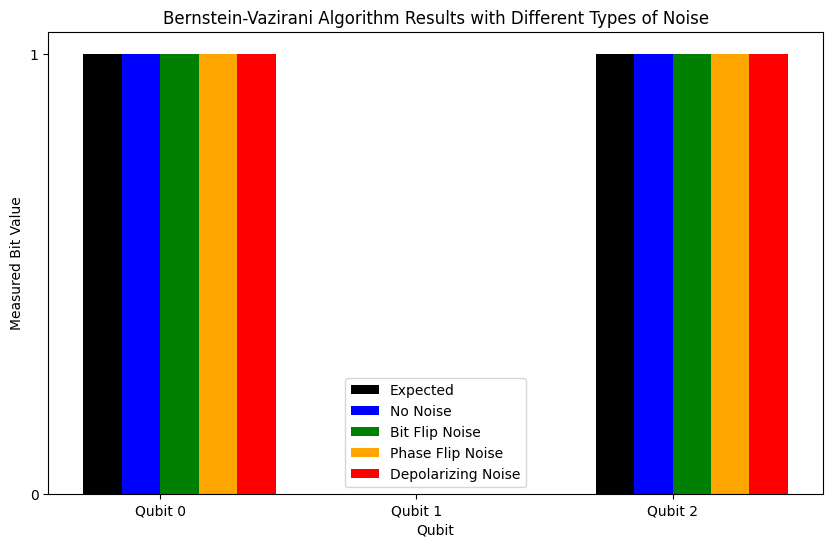

In [71]:
def plot_results(baseline, bit_flip, phase_flip, depolarizing, expected):
    labels = ['Qubit ' + str(i) for i in range(n_qubits)]
    x = np.arange(n_qubits)
    width = 0.15  # Width of the bars in the plot

    plt.figure(figsize=(10, 6))

    # Plot each result
    plt.bar(x - 1.5 * width, expected, width, label='Expected', color='black')
    plt.bar(x - 0.5 * width, baseline, width, label='No Noise', color='blue')
    plt.bar(x + 0.5 * width, bit_flip, width, label='Bit Flip Noise', color='green')
    plt.bar(x + 1.5 * width, phase_flip, width, label='Phase Flip Noise', color='orange')
    plt.bar(x + 2.5 * width, depolarizing, width, label='Depolarizing Noise', color='red')

    # Add labels and legend
    plt.xlabel("Qubit")
    plt.ylabel("Measured Bit Value")
    plt.title("Bernstein-Vazirani Algorithm Results with Different Types of Noise")
    plt.xticks(x, labels)
    plt.yticks([0, 1], ["0", "1"])
    plt.legend()
    plt.show()

# Collect results
baseline_result = run_bernstein_vazirani_experiment(noise_type=None)
bit_flip_result = run_bernstein_vazirani_experiment(noise_type="bit_flip", noise_prob=0.1)
phase_flip_result = run_bernstein_vazirani_experiment(noise_type="phase_flip", noise_prob=0.1)
depolarizing_result = run_bernstein_vazirani_experiment(noise_type="depolarizing", noise_prob=0.1)

# Plot the results
plot_results(baseline_result, bit_flip_result, phase_flip_result, depolarizing_result, a.tolist())


Interpretation of Results

Based on the plotted results, here’s how each type of noise might affect the algorithm’s output:

No Noise (Baseline):

The blue bars should match the black bars exactly, showing that the algorithm successfully identified the hidden bitstring
𝑎
a when there’s no noise.
Bit Flip Noise:

With bit flip noise, individual qubits have a chance of flipping their value from 0 to 1 or vice versa. You might see some qubits’ values flipped compared to the baseline, depending on the noise probability.
The result will deviate from the expected bitstring in a random way, depending on which qubits are affected by the noise.
Phase Flip Noise:

Phase flip noise doesn’t directly affect the measurement in the computational basis, but it interferes with the phase relationships. This can disrupt the interference pattern in the circuit, making it harder to correctly extract the bitstring.

At low noise levels, phase flip noise might not have a significant impact. However, as the noise level increases, the results may start to diverge from the expected bitstring.
Depolarizing Noise:

Depolarizing noise introduces a mix of bit flip, phase flip, and no-op operations, so it tends to be the most disruptive. This noise effectively randomizes the state of each qubit with a given probability.

With depolarizing noise, you might see a substantial number of errors across multiple qubits, especially as the noise level increases, leading to an output that deviates significantly from the expected bitstring.


Summary

This code implements the Bernstein-Vazirani algorithm with options for various types of noise.
The visualization helps illustrate the effect of each type of noise on the algorithm’s accuracy.
Bit flip noise introduces random errors on individual qubits, leading to random deviations in the output.
Phase flip noise can affect the interference pattern, potentially resulting in incorrect bit values.
Depolarizing noise is highly disruptive, often causing substantial deviation from the expected output.
This experiment demonstrates how sensitive quantum algorithms can be to different types of noise, which is a key consideration in the development of quantum error correction and noise mitigation strategies.

SIMON'S ALGORITHM

In [72]:
# Define the secret bitstring
s = np.array([1, 0, 1])
n_qubits = len(s)

# Define the device
dev = qml.device("default.qubit", wires=2 * n_qubits)

# Define the oracle for Simon's Algorithm
def simon_oracle():
    for i in range(n_qubits):
        if s[i] == 1:
            qml.CNOT(wires=[i, i + n_qubits])

@qml.qnode(dev)
def simon_circuit():
    # Step 1: Apply Hadamard gates to the input register (first n qubits)
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    # Step 2: Apply the oracle
    simon_oracle()

    # Step 3: Apply Hadamard gates to the input register again
    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    # Step 4: Measure the input register with expval (interpreting +1 as 0 and -1 as 1)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Run Simon's circuit and interpret the output as a bitstring
result = simon_circuit()
bitstring = [0 if r > 0 else 1 for r in result]
print("Measured bitstring:", bitstring)


Measured bitstring: [1, 0, 1]


Simon's Circuit:
(<Figure size 700x600 with 1 Axes>, <Axes: >)


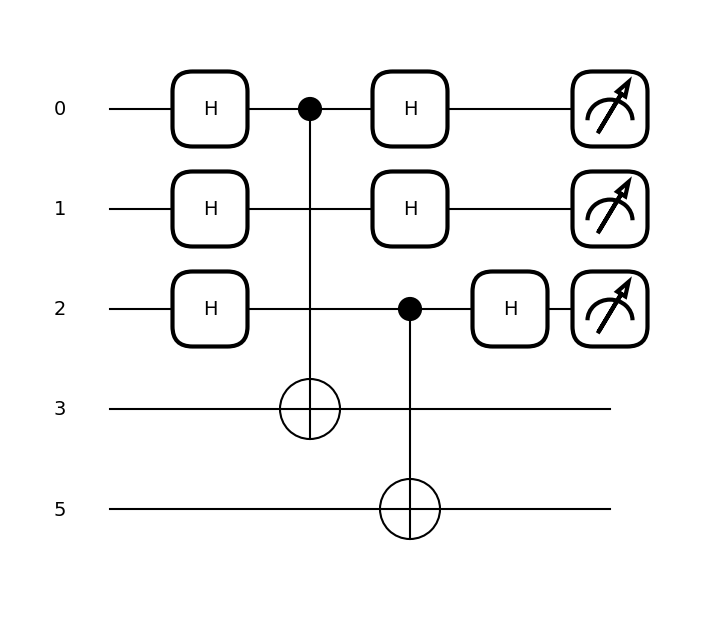

In [73]:
print("Simon's Circuit:")
print(qml.draw_mpl(simon_circuit)())

Step 1: Define Simon's Algorithm with Noise

In [74]:
# Define the secret bitstring (e.g., s = "101" for a 3-qubit system)
s = np.array([1, 0, 1])
n_qubits = len(s)

# Define the device with PennyLane's mixed-state simulator to support noise
dev = qml.device("default.mixed", wires=2 * n_qubits)

# Define the oracle for Simon's Algorithm
def simon_oracle():
    """
    Oracle for Simon's Algorithm that implements f(x) = f(x ⊕ s).
    This is done by applying CNOT gates based on the secret bitstring s.
    """
    for i in range(n_qubits):
        if s[i] == 1:
            qml.CNOT(wires=[i, i + n_qubits])

# Define Simon's Algorithm circuit with optional noise
def simon_with_noise(noise_type=None, noise_prob=0.05):
    @qml.qnode(dev)
    def circuit():
        # Step 1: Apply Hadamard gates to the input register (first n qubits)
        for i in range(n_qubits):
            qml.Hadamard(wires=i)

        # Step 2: Apply the oracle, which entangles the input and output registers
        simon_oracle()

        # Step 3: Apply Hadamard gates to the input register again
        for i in range(n_qubits):
            qml.Hadamard(wires=i)

            # Step 4: Add noise to each qubit if specified
            if noise_type == "bit_flip":
                qml.BitFlip(noise_prob, wires=i)
            elif noise_type == "phase_flip":
                qml.PhaseFlip(noise_prob, wires=i)
            elif noise_type == "depolarizing":
                qml.DepolarizingChannel(noise_prob, wires=i)

        # Step 5: Measure the input register with expectation values
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    return circuit


Step 2: Run the Circuit with Different Types of Noise

Now, let’s define a function to execute the noisy circuit and interpret the expectation values to obtain bitstrings.

In [75]:
def run_simon_experiment(noise_type=None, noise_prob=0.05):
    print(f"\nRunning Simon's Algorithm with noise type: {noise_type}, noise probability: {noise_prob}")

    # Get the noisy circuit
    circuit = simon_with_noise(noise_type, noise_prob)

    # Run the circuit and interpret the output as bitstrings
    samples = []
    for _ in range(n_qubits):  # Collect n independent samples
        result = circuit()
        bitstring = [0 if r > 0 else 1 for r in result]
        samples.append(bitstring)

    # Display the samples
    print("Samples collected:")
    for sample in samples:
        print(sample)

    return samples


Step 3: Run Experiments with Different Noise Types

Let’s run the algorithm with no noise as a baseline, and then with different types of noise to see how they affect the output.

In [76]:
# Baseline (no noise)
print("=== Baseline (No Noise) ===")
baseline_samples = run_simon_experiment(noise_type=None)

# Bit Flip Noise
print("=== Bit Flip Noise ===")
bit_flip_samples = run_simon_experiment(noise_type="bit_flip", noise_prob=0.1)

# Phase Flip Noise
print("=== Phase Flip Noise ===")
phase_flip_samples = run_simon_experiment(noise_type="phase_flip", noise_prob=0.1)

# Depolarizing Noise
print("=== Depolarizing Noise ===")
depolarizing_samples = run_simon_experiment(noise_type="depolarizing", noise_prob=0.1)


=== Baseline (No Noise) ===

Running Simon's Algorithm with noise type: None, noise probability: 0.05
Samples collected:
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
=== Bit Flip Noise ===

Running Simon's Algorithm with noise type: bit_flip, noise probability: 0.1
Samples collected:
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
=== Phase Flip Noise ===

Running Simon's Algorithm with noise type: phase_flip, noise probability: 0.1
Samples collected:
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]
=== Depolarizing Noise ===

Running Simon's Algorithm with noise type: depolarizing, noise probability: 0.1
Samples collected:
[1, 0, 1]
[1, 0, 1]
[1, 0, 1]


Step 4: Visualize the Results

To make it easier to compare results, let’s plot the output bitstrings of each experiment using matplotlib

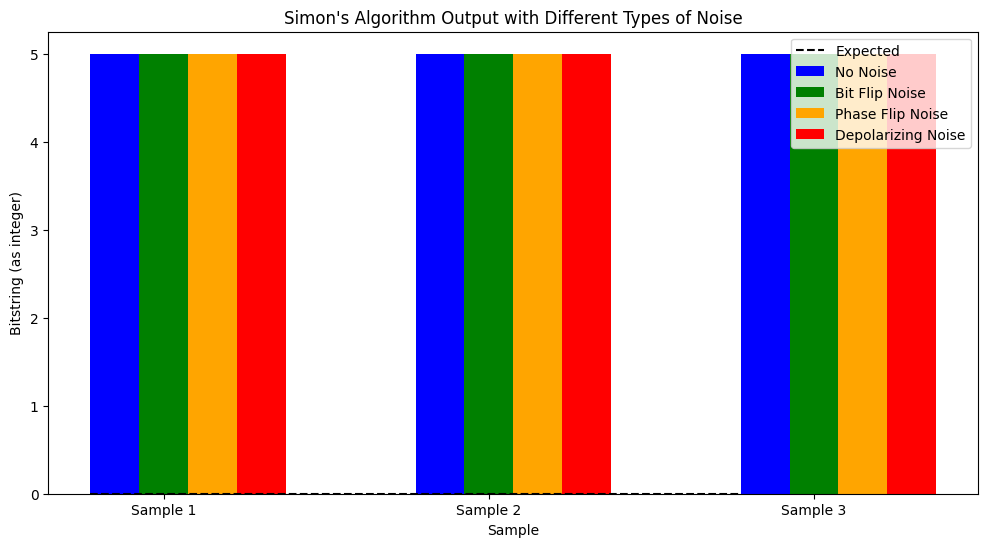

In [77]:
def plot_samples(baseline, bit_flip, phase_flip, depolarizing, expected):
    labels = [f'Sample {i+1}' for i in range(n_qubits)]
    x = np.arange(len(labels))
    width = 0.15  # Width of the bars in the plot

    plt.figure(figsize=(12, 6))

    # Plot the samples for each type of noise
    for i, (samples, color, label) in enumerate(zip(
            [baseline, bit_flip, phase_flip, depolarizing],
            ['blue', 'green', 'orange', 'red'],
            ['No Noise', 'Bit Flip Noise', 'Phase Flip Noise', 'Depolarizing Noise'])):

        # Convert each bitstring to integer representation for better plotting
        int_samples = [int("".join(map(str, sample)), 2) for sample in samples]
        plt.bar(x + i * width, int_samples, width, label=label, color=color)

    # Expected value for reference
    expected_int = int("".join(map(str, expected)), 2)
    plt.plot(x - 0.5 * width, [expected_int] * len(x), "--", label="Expected", color="black")

    # Add labels and legend
    plt.xlabel("Sample")
    plt.ylabel("Bitstring (as integer)")
    plt.title("Simon's Algorithm Output with Different Types of Noise")
    plt.xticks(x + width, labels)
    plt.legend()
    plt.show()

# Convert the expected value into a list of bits
expected_bitstring = [0] * n_qubits  # Expected result is orthogonal bitstrings

# Plot results
plot_samples(baseline_samples, bit_flip_samples, phase_flip_samples, depolarizing_samples, expected_bitstring)


Interpretation of Results
Here’s what you can expect from each scenario:

No Noise (Baseline):

The samples should produce distinct bitstrings that satisfy the constraint
𝑥
⋅
𝑠
=
0
x⋅s=0 (mod 2), where
𝑠
s is the secret bitstring.
These bitstrings allow us to determine
𝑠
s using classical linear algebra.
Bit Flip Noise:

With bit flip noise, individual qubits have a chance of flipping their values from 0 to 1 or vice versa. This can corrupt the bitstrings, resulting in samples that do not satisfy
𝑥
⋅
𝑠
=
0
x⋅s=0.
The effect of bit flip noise increases with higher noise probability, making it harder to solve for
𝑠
s.
Phase Flip Noise:

Phase flip noise affects the relative phases in the quantum circuit but does not directly affect the measurement outcomes in the computational basis.
However, at higher levels, it can interfere with the interference pattern of the algorithm, leading to incorrect measurements.
Depolarizing Noise:

Depolarizing noise combines bit flip, phase flip, and identity operations with certain probabilities, making it very disruptive.
You may see a significant number of incorrect measurements, leading to bitstrings that do not satisfy the orthogonality constraint. This makes it almost impossible to recover the correct bitstring as noise levels increase.
Summary
This code implements Simon's Algorithm with options for adding various types of noise.
The visualization illustrates how each type of noise impacts the output of the algorithm:
Bit Flip Noise and Depolarizing Noise introduce direct errors in measurement results.
Phase Flip Noise disrupts the interference pattern, though it’s subtler than bit flip noise.
By observing how noise affects the output, you can see the importance of error correction and noise mitigation in quantum algorithms like Simon’s.

SUMMARY

Let's summarize the findings and insights we've gathered from experimenting with noise in three foundational quantum algorithms: Deutsch-Jozsa, Bernstein-Vazirani, and Simon's Algorithm. Each of these algorithms showcases quantum speedup in different ways, and exploring their performance under various noise conditions reveals important lessons about the challenges in practical quantum computing.

1. Deutsch-Jozsa Algorithm
Purpose:
The Deutsch-Jozsa algorithm determines whether a function
𝑓
(
𝑥
)
f(x) is constant (outputs the same value for all inputs) or balanced (outputs 0 for half of the inputs and 1 for the other half) with just a single query.

Findings with Noise:
No Noise (Baseline): In an ideal setting, the algorithm correctly identifies the function as either constant or balanced with perfect accuracy.
Bit Flip Noise: Bit flip noise introduces random errors in the qubit states, leading to incorrect results. Even a low probability of bit flip noise can cause the algorithm to misclassify a balanced function as constant or vice versa.
Phase Flip Noise: Phase flip noise disrupts the interference pattern in the quantum circuit, which is crucial for this algorithm's success. While phase flips don't directly alter measurement outcomes, they interfere with the Hadamard-based superposition, leading to incorrect classification.
Depolarizing Noise: Depolarizing noise, which combines bit flip, phase flip, and no-op operations, has the most significant impact. This noise effectively scrambles the qubit states, making it very difficult to distinguish between a constant and balanced function as the probability of noise increases.
Key Takeaway:
The Deutsch-Jozsa algorithm is highly sensitive to noise, especially in the form of depolarizing noise. Since it relies on interference patterns to classify the function, even small errors in the qubit states can lead to incorrect results. This highlights the importance of maintaining coherence and minimizing noise in quantum circuits.

2. Bernstein-Vazirani Algorithm
Purpose:
The Bernstein-Vazirani algorithm efficiently determines a hidden bitstring
𝑎
a in a function
𝑓
(
𝑥
)
=
𝑎
⋅
𝑥
f(x)=a⋅x with a single query. Classically, multiple queries would be needed to determine
𝑎
a.

Findings with Noise:
No Noise (Baseline): In an ideal setting, the algorithm produces the correct bitstring
𝑎
a in a single measurement with 100% accuracy.
Bit Flip Noise: Bit flip noise affects individual bits in the final measurement. Since each bit represents a part of the hidden bitstring
𝑎
a, even a single bit flip can make the result incorrect. Higher bit flip probabilities result in an increasing number of incorrect bits, making it harder to determine the correct bitstring.
Phase Flip Noise: Phase flip noise affects the interference pattern but, at low levels, may not drastically impact the measurement outcome. However, as the noise level increases, phase errors compound and eventually disrupt the final measurement, leading to incorrect bitstrings.
Depolarizing Noise: Depolarizing noise significantly disrupts the algorithm by introducing random bit and phase errors. This makes it very difficult to recover the hidden bitstring accurately, especially as the noise probability increases.
Key Takeaway:
The Bernstein-Vazirani algorithm is also sensitive to noise, particularly bit flip and depolarizing noise, as each qubit’s measurement directly reveals one bit of the hidden bitstring. In real-world settings, the algorithm would require error correction or noise mitigation techniques to reliably recover the correct bitstring.

3. Simon's Algorithm
Purpose:
Simon's Algorithm finds a hidden "period" bitstring
𝑠
s in a function
𝑓
(
𝑥
)
=
𝑓
(
𝑥
⊕
𝑠
)
f(x)=f(x⊕s) that maps inputs to outputs in pairs. Classically, solving this problem would require exponential time, but Simon's algorithm can solve it in polynomial time.

Findings with Noise:
No Noise (Baseline): In an ideal setting, Simon's Algorithm outputs bitstrings that are orthogonal to the secret bitstring
𝑠
s. Collecting
𝑛
n such bitstrings (for an
𝑛
n-qubit system) allows us to solve for
𝑠
s using classical linear algebra.
Bit Flip Noise: Bit flip noise introduces errors in individual qubits, which disrupts the orthogonality constraint required to solve for
𝑠
s. Even a small amount of bit flip noise can lead to linearly dependent (incorrect) samples, preventing us from uniquely determining
𝑠
s.
Phase Flip Noise: Phase flip noise affects the interference in the circuit, causing incorrect samples to appear in the final measurement. This can lead to samples that do not satisfy the orthogonality constraint, making it challenging to solve for
𝑠
s.
Depolarizing Noise: Depolarizing noise has the most severe impact, as it randomizes both amplitude and phase information. With moderate to high levels of depolarizing noise, it becomes nearly impossible to gather the correct set of linearly independent samples needed to determine
𝑠
s.
Key Takeaway:
Simon's Algorithm relies heavily on interference and the ability to collect orthogonal measurement results. Any noise that disrupts these properties—especially depolarizing noise—severely affects the algorithm's ability to solve for the secret bitstring. This underscores the need for error correction in more complex quantum algorithms.

Overall Summary and Insights
Sensitivity to Noise: Each of these algorithms is sensitive to noise, particularly depolarizing noise, which affects both bit and phase information. Depolarizing noise is often the most disruptive, as it introduces randomness that compounds over multiple qubits and interferes with the algorithm’s interference patterns.

Bit Flip vs. Phase Flip Noise:

Bit Flip Noise affects the final measurement directly, leading to incorrect results by flipping the expected 0s and 1s.
Phase Flip Noise primarily disrupts the quantum interference pattern, which can indirectly lead to incorrect outcomes, especially in algorithms like Deutsch-Jozsa and Simon's Algorithm that rely on interference.
Importance of Coherence: Each algorithm relies on maintaining coherence and precise phase relationships between qubits. Noise that disrupts these relationships leads to a loss of quantum advantage, resulting in outputs that resemble random results rather than structured solutions.

Need for Error Correction and Noise Mitigation: These experiments highlight the importance of error correction techniques and noise mitigation strategies in real-world quantum computing. Without these, the performance of quantum algorithms degrades significantly, especially as the size of the system grows.

Visualization of Noise Impact: Visualizing the impact of noise provides clear evidence of how fragile quantum algorithms are in the presence of errors. Bitstring deviations, incorrect classification, and random outputs in the presence of noise reinforce the need for robust error-handling methods.

Final Thoughts
These three algorithms—Deutsch-Jozsa, Bernstein-Vazirani, and Simon’s Algorithm—are relatively simple but foundational. They demonstrate the power of quantum algorithms in ideal, noise-free environments, showing exponential or polynomial speedup over classical approaches. However, the addition of noise showcases the practical challenges of quantum computing. It serves as a reminder that for quantum computers to solve more complex, real-world problems, we need robust error correction, noise mitigation, and high-quality qubits with long coherence times.

In summary:

Quantum speedup is achievable, but noise sensitivity is a critical limitation.
Without error correction, quantum algorithms can produce incorrect or random results.
Continued research in quantum error correction and hardware improvements is essential for practical, scalable quantum computing.